In [1]:
import warnings

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import scipy.optimize as opt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

# ignore warnings
warnings.filterwarnings("ignore")


# Cleaning and Wrangling

In [2]:
# read datasets
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# Colomn Information
# train.info(verbose=True, null_counts=True) or
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Summary Statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Loan_id coloumn is not needed, Drop it.
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

# Then, check the new shape
print(f"train_set (row, col): {train.shape}\n\ntest_set (row, col):{test.shape}")

train_set (row, col): (614, 12)

test_set (row, col):(367, 11)


In [10]:
# We have some missing data.
# So, missing data in decending order
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Filling the missing data.
print('Before filling missing values\n\n', '-'*40, '\n')
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term','Gender','Married']


for col in null_cols:
    print(f"{col}:\n{train[col].value_counts()}\n","-"*40)
    train[col] = train[col].fillna(
    train[col].dropna().mode().values[0] ) 
    

train.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","-"*40,"\n")
for col in null_cols:
    print(f"\n{col}:\n{train[col].value_counts()}\n","-"*40)   

Before filling missing values

 ---------------------------------------- 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 ----------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 ----------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 ----------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 ----------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 ----------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 ----------------------------------------
Married:
Y

# Data Visuvalization

Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

In [12]:
# List of all colomns.colomns
# Cols = train.tolist()
# List all numeric colomns
num = train.select_dtypes('number').columns.to_list()

#List all categoric colomns
cat = train.select_dtypes('object').columns.to_list()


# numeric dataframe
loan_num = train[num]
# categoric dataframe
loan_cat = train[cat]

Y    422
N    192
Name: Loan_Status, dtype: int64


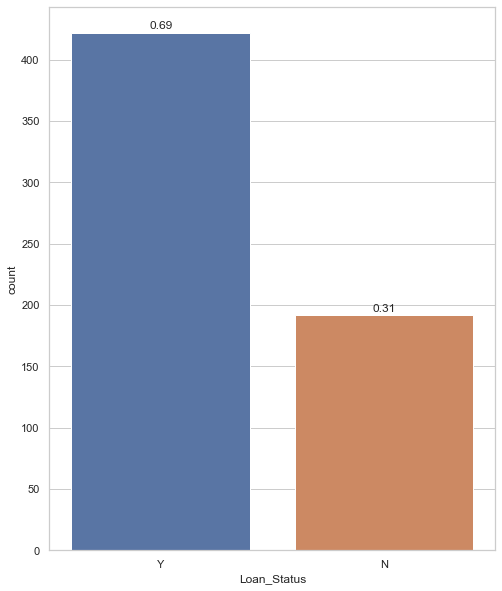

In [13]:
# train[cat[-1]].hist(grid=False)
print(train[cat[-1]].value_counts())

# print(i)
total = float(len(train[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style='whitegrid')
ax = sns.countplot(train[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

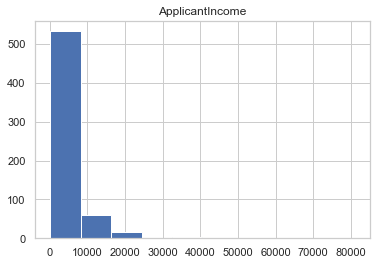

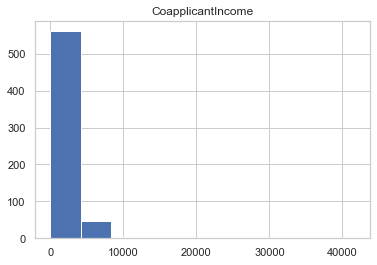

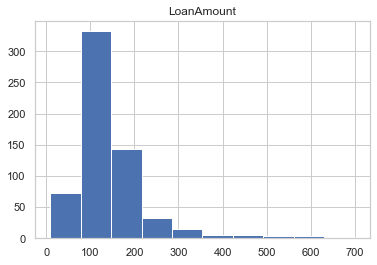

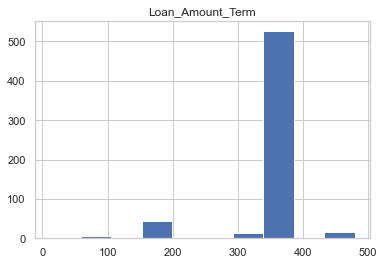

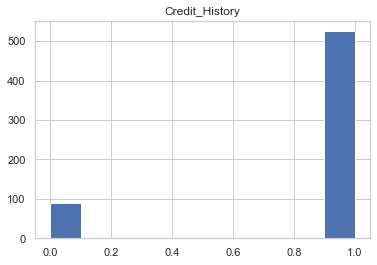

In [14]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

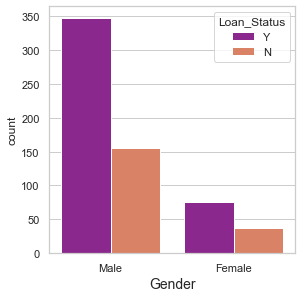

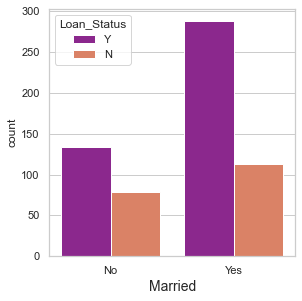

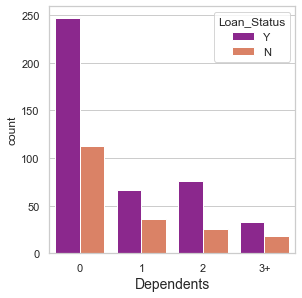

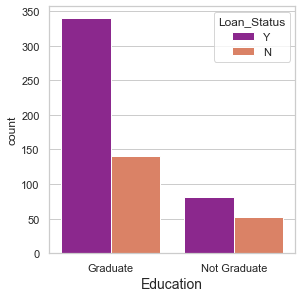

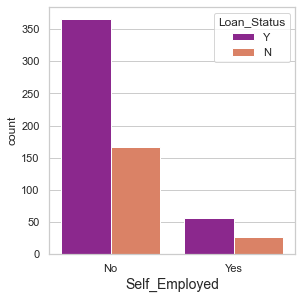

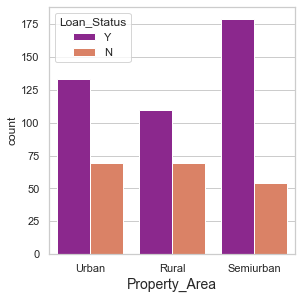

In [15]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [16]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train = train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
test = test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(train.Dependents)
Dependents__ = pd.to_numeric(test.Dependents)

# dropping the previous Dependents column
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
train = pd.concat([train, Dependents_], axis = 1)
test = pd.concat([test, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}\n")
print(train.info(), "\n\n", test.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

# Correlation  Matrix

<AxesSubplot:>

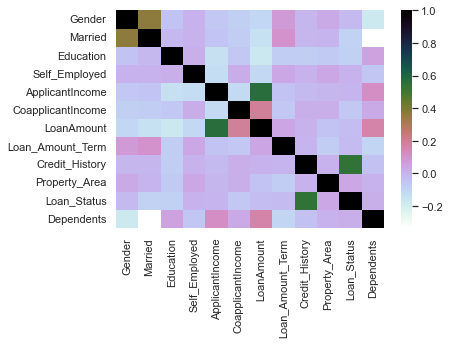

In [17]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='cubehelix_r')

In [18]:
#correlation table
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.

# Machine Learning Models

First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.

1. KNN

2. Decision tree

3. SVM

4. Logistic Regression

In [19]:
# Create a numpy array for the features we'll be selecting. We use double brackets to create the numpy array, which is required for the scikit learn alogrithms later. 
features = train[['Gender','Married','Education','Self_Employed','Dependents']]
features[0:5]

,Gender,Married,Education,Self_Employed,Dependents
0,1,2,1,2,0
1,1,1,1,2,1
2,1,1,1,1,0
3,1,1,2,2,0
4,1,2,1,2,0


In [20]:
X = features
X[0:5]

,Gender,Married,Education,Self_Employed,Dependents
0,1,2,1,2,0
1,1,1,1,2,1
2,1,1,1,1,0
3,1,1,2,2,0
4,1,2,1,2,0


In [21]:
y = train['Loan_Status'].values
y[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [22]:
# Normalize using scikit learn preprocessing libraries StandardScaler, fit, transform. 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.47234264,  1.37208932, -0.52836225,  0.39260074, -0.73780632],
       [-0.47234264, -0.72881553, -0.52836225,  0.39260074,  0.25346957],
       [-0.47234264, -0.72881553, -0.52836225, -2.54711697, -0.73780632],
       [-0.47234264, -0.72881553,  1.89264089,  0.39260074, -0.73780632],
       [-0.47234264,  1.37208932, -0.52836225,  0.39260074, -0.73780632]])

# KNN

In [23]:
# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (491, 5) (491,)
Test set: (123, 5) (123,)


In [24]:
# Determine optimal k value. 
best_score = 0.0
acc_list=[]

for k in range(3,15):
    
    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto')
    
    # using 10-fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score = scores.mean()
    acc_list.append(score)
    
    if score > best_score:
        best_score=score
        best_clf = clf_knn
        best_k = k
        
print("Best K is :",best_k,"| Cross validation Accuracy :",best_score)
clf_knn = best_clf

Best K is : 13 | Cross validation Accuracy : 0.6628767847699629


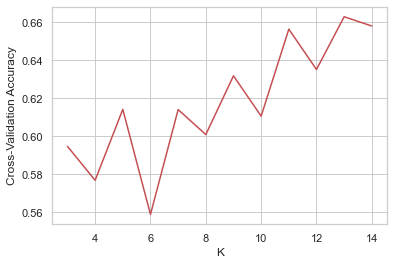

In [25]:
# Plot accuracy of various K values. 
plt.plot(range(3,15),acc_list, c="r")
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [26]:
# Train model using our algorithm above with optimal value of K of 7
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [27]:
# Make predictions on test set using our model
y_hat_knn = clf_knn.predict(X_test)
y_hat_knn[0:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [28]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

           0       0.25      0.10      0.15        39
           1       0.67      0.86      0.75        84

    accuracy                           0.62       123
   macro avg       0.46      0.48      0.45       123
weighted avg       0.54      0.62      0.56       123



In [29]:
# Jaccard similarity score for KNN model for test set
jaccard_knn = jaccard_score(y_test, y_hat_knn)
jaccard_knn

0.6050420168067226

In [30]:
# F1 score for KNN model for test set
f1_knn = f1_score(y_test, y_hat_knn, average='weighted')
f1_knn

0.5609965057289792

# Decision Tree

In [31]:
# Test max depths from 1 to 19
depth_range = range(1, 20)

# Create empty array for jaccard and f1 scores 
jaccard_score_ = []
f1_score_ = []

# Use for loop to train decision tree using increasing max depth values.  
# Make predictions using test set, append jaccard and F1 score to arrays created above
for d in depth_range:
    dec_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dec_tree.fit(X_train, y_train)
    y_hat_tree = dec_tree.predict(X_test)
    jaccard_score_.append(jaccard_score(y_test, y_hat_tree))
    f1_score_.append(f1_score(y_test, y_hat_tree, average = 'weighted'))

In [32]:
# Create dataframe with jaccard and F1 accuaracy values to determine best max depth. We see the best max depth is d = 12. 
result = pd.DataFrame([jaccard_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9','d = 10', 'd = 11', 'd = 12', 'd = 13', 'd = 14', 'd = 15', 'd = 16', 'd = 17', 'd = 18', 'd = 19'])
result.columns.name = 'Evaluation Metrics'
result

Evaluation Metrics,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11,d = 12,d = 13,d = 14,d = 15,d = 16,d = 17,d = 18,d = 19
Jaccard,0.682927,0.682927,0.682927,0.655462,0.647059,0.647059,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542,0.652542
F1,0.554259,0.554259,0.554259,0.592562,0.587317,0.587317,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508,0.601508


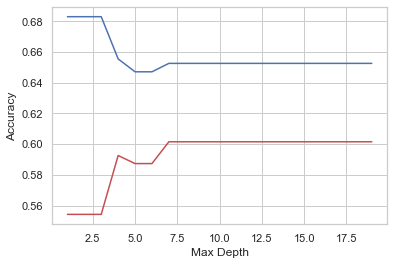

In [33]:
# Plot accuracy of various max depths, jaccard score in blue and F1 score in red. 
plt.plot(range(1,20),jaccard_score_)
plt.plot(range(1,20),f1_score_, c='r')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# Set tree algorithm to max depth 12
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [35]:
# Train decision tree
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [36]:
# Make prediction on test set using our model
y_hat_tree = dec_tree.predict(X_test)
y_hat_tree[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [37]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_tree))

              precision    recall  f1-score   support

           0       0.42      0.13      0.20        39
           1       0.69      0.92      0.79        84

    accuracy                           0.67       123
   macro avg       0.56      0.52      0.49       123
weighted avg       0.61      0.67      0.60       123



In [38]:
# Jaccard similarity score for decision tree
jaccard_tree = jaccard_score(y_test, y_hat_tree)
jaccard_tree

0.652542372881356

In [39]:
# F1 score for decision tree
f1_tree = f1_score(y_test, y_hat_tree, average='weighted')
f1_tree

0.6015082956259427

# SVM

In [40]:
# Determine optimal kernel function

# Array of kernel functions
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']

# Empty array for accuracy score (F1 score)
accuracy_score = []

# For each kernel function, train SVM model, run prediction on test set, calculate F1 score and append it to accuracy_score array
for k in kernel_func:
    svc_model = SVC(kernel = k) 
    svc_model.fit(X_train, y_train)
    y_hat_svm = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, y_hat_svm, average = 'weighted'))

accuracy_score

[0.5676655052264808,
 0.5684711481261155,
 0.5728036940563581,
 0.5542594556380346]

Text(0, 0.5, 'Accuracy')

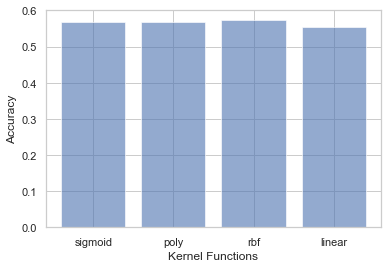

In [41]:
# Bar plot of accuracy score for each kernel function

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.6)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [42]:
# Set SVM algorithm with polynomial kernel function
svc_model = SVC(kernel = 'poly')

In [43]:
# Train SVM model 
svc_model.fit(X_train, y_train)
svc_model

SVC(kernel='poly')

In [44]:
# Make prediction on test set using our model
y_hat_svm = svc_model.predict(X_test)
y_hat_svm [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [45]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        39
           1       0.69      0.99      0.81        84

    accuracy                           0.68       123
   macro avg       0.59      0.51      0.43       123
weighted avg       0.63      0.68      0.57       123



In [46]:
# Jaccard similarity score for SVM
jaccard_svm = jaccard_score(y_test, y_hat_svm)
jaccard_svm

0.680327868852459

In [47]:
# F1 score for SVM
f1_svm = f1_score(y_test, y_hat_svm, average='weighted')
f1_svm

0.5684711481261155

# Logistic Regression

In [48]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        y_hat_lr = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = newton-cg is : 0.616221741691069
Test 2: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6162217692296336
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6170274259598264
Test 4: Accuracy at C = 0.1 when Solver = sag is : 0.6162217952058499
Test 5: Accuracy at C = 0.1 when Solver = saga is : 0.6162218720991819


Test 6: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6181911509286047
Test 7: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6181913158707719
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.6340820291943249
Test 9: Accuracy at C = 0.01 when Solver = sag is : 0.6181903662486554
Test 10: Accuracy at C = 0.01 when Solver = saga is : 0.6181910311542225


Test 11: Accuracy at C = 0.001 when Solver = newton-cg is : 0.6231382258821246
Test 12: Accuracy at C = 0.001 when Solver = lbfgs is : 0.6231382174096047
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6780903523749681
Test 14: Accuracy at C = 0.0

Text(0, 0.5, 'Testing Accuracy')

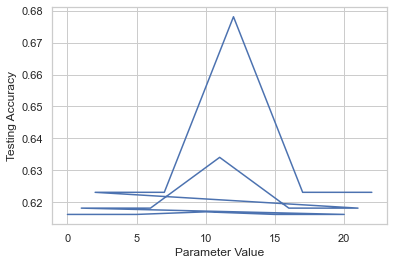

In [49]:
# Visualize the above accuracy tests, with the peak at test 13, which corresponds to C = 0.001 and solver = liblinear

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [50]:
# Set logistic regression with optimal regularization of C = 0.001 and solver = 'liblinear'
lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')

In [51]:
# Train logistic regression model
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, solver='liblinear')

In [52]:
# Make prediction on test set using our model
y_hat_lr = lr_model.predict(X_test)

In [53]:
# Determine probabilities of loan classification using our test set. We'll need this for our logloss score. 
y_hat_lr_prob = lr_model.predict_proba(X_test)

In [54]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



In [55]:
# Jaccard similarity score for logistic regression
jaccard_lr = jaccard_score(y_test, y_hat_lr)
jaccard_lr

0.6829268292682927

In [56]:
# F1 score for logistic regression
f1_lr = f1_score(y_test, y_hat_lr, average='weighted')
f1_lr

0.5542594556380346

In [57]:
# Logloss for logistic regression
logloss_lr = log_loss(y_test, y_hat_lr_prob)
logloss_lr

0.6780903523749681

# Evaluation

In [58]:
# Create dataframe with evaluation metrics
evaluation = {"Jaccard":[jaccard_knn, jaccard_tree, jaccard_svm, jaccard_lr], 
             "F1-score":[f1_knn, f1_tree, f1_svm, f1_lr],
             "Log Loss":["NA", "NA", "NA", logloss_lr] 
             }
eval_df = pd.DataFrame(evaluation, columns=["Jaccard", "F1-score", "Log Loss"], index=["KNN", "Decision Tree", "SVM", "Logistic Regression"])
eval_df.columns.name = "Algorithm"
eval_df

Algorithm,Jaccard,F1-score,Log Loss
KNN,0.605042,0.560997,NA
Decision Tree,0.652542,0.601508,NA
SVM,0.680328,0.568471,NA
Logistic Regression,0.682927,0.554259,0.67809
